# Load Dataset

In [28]:
import pandas as pd

data = pd.read_csv("athletes.csv")
display(data)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,NaN,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|


## Commit to LakeFS

In [29]:
import lakefs_wrapper

lakefs_wrapper.commit_dataframe(data, version=1)

Failed committing transaction tx-b301f073-c733-40b5-bec2-1c0750841c0e: code: 400, reason: Bad Request, body: {'message': 'commit: no changes'}


# Clean dataset

In [30]:
import numpy as np

# Remove not relevant columns
data = data.dropna(subset=['region','age','weight','height','howlong','gender','eat',
                           'train','background','experience','schedule','howlong',
                           'deadlift','candj','snatch','backsq','experience',
                           'background','schedule','howlong'])
data = data.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',
                          'filthy50','fgonebad','run400','run5k','pullups','train'])

# Remove Outliers
data = data[data['weight'] < 1500]
data = data[data['gender'] != '--']
data = data[data['age'] >= 18]
data = data[(data['height'] < 96) & (data['height'] > 48)]

data = data[(data['deadlift'] > 0) & (data['deadlift'] <= 1105)|((data['gender'] == 'Female')
             & (data['deadlift'] <= 636))]
data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

# Clean Survey Data
decline_dict = {'Decline to answer|': np.nan}
data = data.replace(decline_dict)
data = data.dropna(subset=['background','experience','schedule','howlong','eat'])

## Commit to LakeFS

In [31]:
import lakefs_wrapper

lakefs_wrapper.commit_dataframe(data, version=2)

Failed committing transaction tx-89bbc1b8-9822-4be1-b53e-2510b57cbddb: code: 400, reason: Bad Request, body: {'message': 'commit: no changes'}


# Prepare Datasets

## V1

In [32]:
data = lakefs_wrapper.load_dataframe(version=1)
display(data.head())

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


In [33]:
import numpy as np
lifts = ["candj", "snatch", "deadlift", "backsq"]

X_v1 = data
y_v1 = np.sum(data[lifts], axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_v1_train, X_v1_test, y_v1_train, y_v1_test = train_test_split(X_v1, y_v1, test_size=0.2)

## V2

In [35]:
data = lakefs_wrapper.load_dataframe(version=2)
display(data.head())

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong
0,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|
1,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|
2,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|
3,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,1-2 years|
4,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I st...,4+ years|


In [36]:
X_v2 = data
y_v2 = np.sum(data[lifts], axis=1)

In [37]:
X_v2_train, X_v2_test, y_v2_train, y_v2_test = train_test_split(X_v2, y_v2, test_size=0.2)

# V1 EDA

In [86]:
display(X_v1_train.describe())

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,338402.000000,264890.000000,127795.000000,183741.000000,4.429400e+04,2.415800e+04,3.255100e+04,1.546900e+04,2.372800e+04,1.771000e+04,2.888600e+04,8.352700e+04,7.779300e+04,9.222200e+04,8.836500e+04,4.037800e+04
mean,292752.153214,32.516075,68.153864,170.882862,1.147853e+03,1.332596e+03,6.629578e+02,2.255301e+03,1.776120e+03,6.241753e+02,3.571475e+03,2.916319e+02,2.671932e+02,7.878757e+02,6.624960e+02,5.350585e+04
std,184923.226170,7.723966,23.253265,62.631904,8.053538e+04,7.632196e+04,5.472194e+04,6.773550e+04,1.092920e+05,6.308556e+04,1.307777e+05,2.903765e+04,3.029290e+04,6.176351e+04,5.650748e+04,1.068716e+07
min,82.000000,13.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00
25%,135196.250000,27.000000,66.000000,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.309000e+03,2.400000e+02,6.200000e+01,1.240000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275852.000000,31.000000,69.000000,170.000000,2.900000e+02,5.950000e+02,1.940000e+02,1.550000e+03,2.940000e+02,7.000000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473021.750000,37.000000,72.000000,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.810000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01
max,633083.000000,125.000000,7087.000000,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


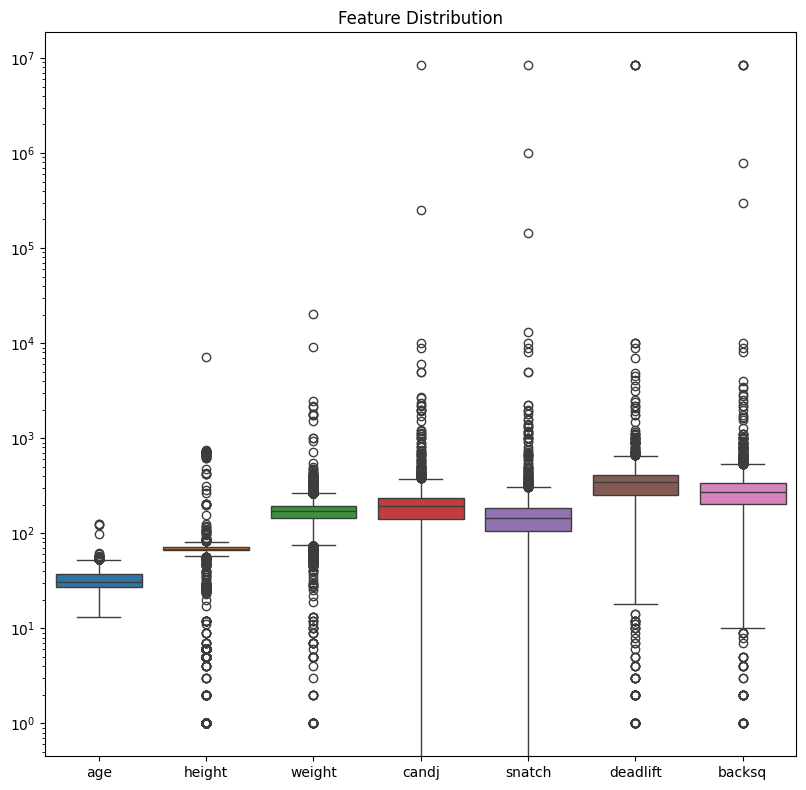

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.boxplot(data=X_v1_train[data.select_dtypes(include=np.number).columns])
plt.title("Feature Distribution")
plt.tight_layout()
plt.yscale('log')
plt.show()

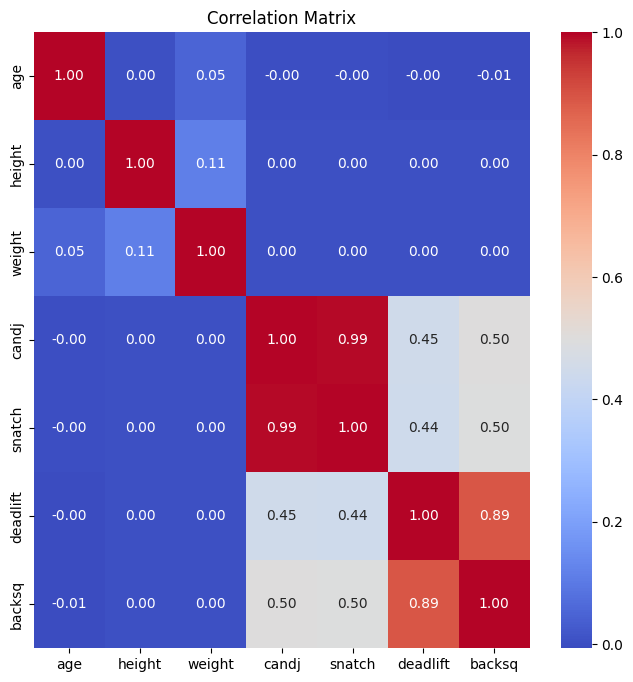

In [97]:
corr = X_v1_train[data.select_dtypes(include=np.number).columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# V1 Pipeline

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

categorical_cols = ["region", "eat", "background", "experience", "schedule", "gender", "howlong"]
numerical_cols = ["age", "weight", "height"]

preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
)

model = make_pipeline(preprocessor, HistGradientBoostingRegressor())

In [39]:
model.fit(X_v1_train, y_v1_train)
predictions = model.predict(X_v1_test)

# V1 Metrics

In [40]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

rmse = root_mean_squared_error(y_v1_test, predictions)
mape = mean_absolute_percentage_error(y_v1_test, predictions)
print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 4438.206330410973
MAPE: 8.753109432819107e+17


# V2 EDA

In [83]:
display(X_v2_train.describe())

,age,height,weight,candj,snatch,deadlift,backsq
count,24023.000000,24023.000000,24023.000000,24023.000000,24023.000000,24023.000000,24023.000000
mean,32.114182,68.867544,177.194688,205.310702,156.052075,361.725388,294.073305
std,7.431310,3.779441,32.466243,58.723338,48.888659,96.922385,85.118967
min,18.000000,52.000000,5.000000,1.000000,1.000000,0.000000,1.000000
25%,27.000000,66.000000,155.000000,160.000000,120.000000,287.000000,225.000000
50%,31.000000,69.000000,178.000000,205.000000,155.000000,375.000000,300.000000
75%,37.000000,72.000000,197.000000,245.000000,190.000000,430.000000,355.000000
max,56.000000,83.000000,444.000000,386.000000,345.000000,1000.000000,810.000000


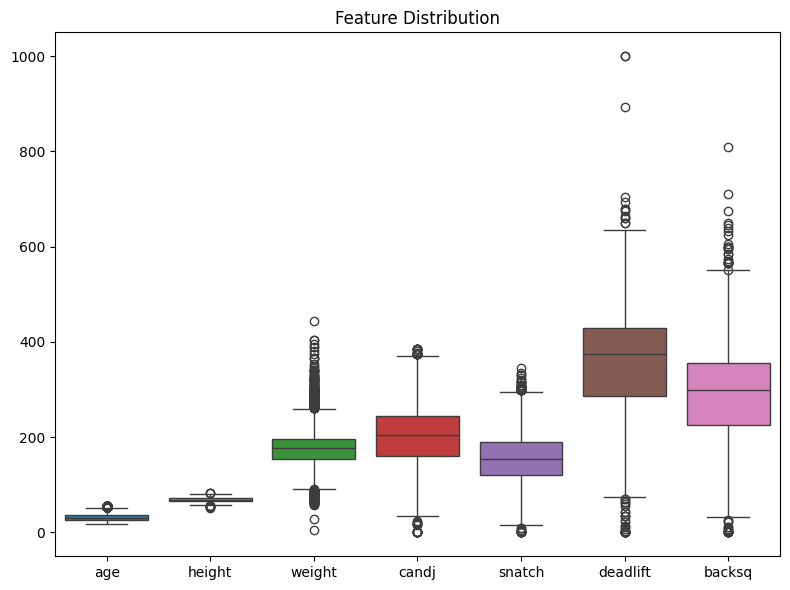

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=X_v2_train)
plt.title("Feature Distribution")
plt.tight_layout()
plt.show()

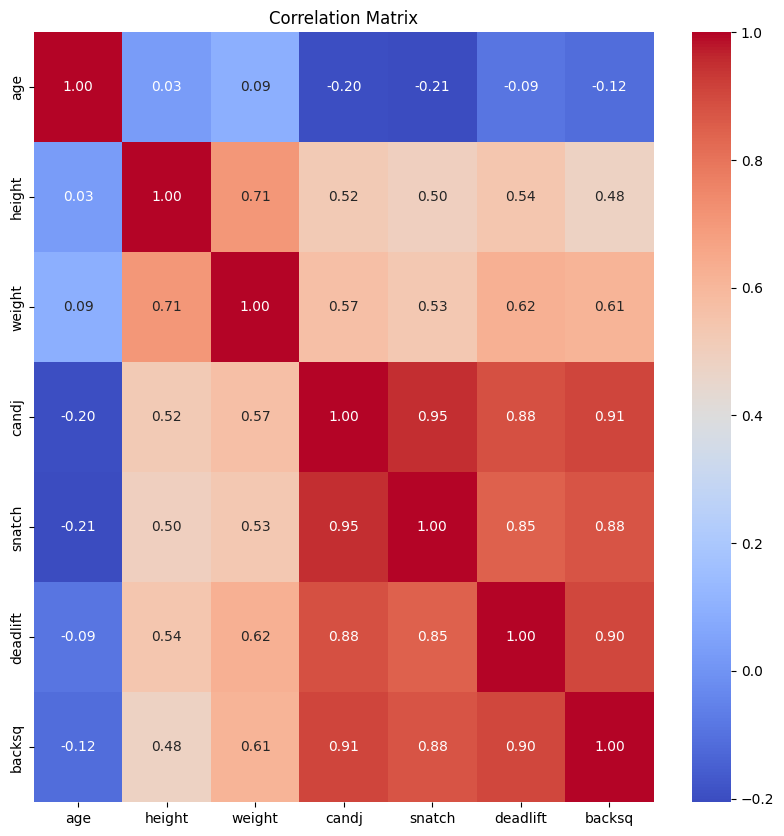

In [93]:
corr = X_v2_train[data.select_dtypes(include=np.number).columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# V2 Pipeline

In [41]:
model.fit(X_v2_train, y_v2_train)
predictions = model.predict(X_v2_test)

# V2 Metrics

In [42]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
rmse = root_mean_squared_error(y_v2_test, predictions)
mape = mean_absolute_percentage_error(y_v2_test, predictions)
print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 137.71454011892737
MAPE: 0.11496349512933715


# Compute DP

In [48]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from opacus import PrivacyEngine

preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ]
)

# Transform data
X_train_transformed = preprocessor.fit_transform(X_v2_train)
X_test_transformed = preprocessor.transform(X_v2_test)

# Convert to tensors (fixed version)
X_train_tensor = torch.tensor(X_train_transformed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_v2_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_v2_test.to_numpy(), dtype=torch.float32).view(-1, 1)

# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
input_dim = X_train_transformed.shape[1]
model = RegressionModel(input_dim)

# Set up optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

# Make model differentially private
privacy_engine = PrivacyEngine()
model, optimizer, train_loader = privacy_engine.make_private(
    module=model,
    optimizer=optimizer,
    data_loader=train_loader,
    noise_multiplier=1.1,
    max_grad_norm=1.0,
)

# Training loop
criterion = nn.MSELoss()
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        X, y = batch
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

/home/ubuntu/.virtualenvs/pytorch/lib/python3.12/site-packages/opacus/privacy_engine.py:96: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(


Epoch 1/25, Loss: 1197265.875
Epoch 2/25, Loss: 886793.0625
Epoch 3/25, Loss: 377974.03125
Epoch 4/25, Loss: 77315.03125
Epoch 5/25, Loss: 43408.02734375
Epoch 6/25, Loss: 35300.69140625
Epoch 7/25, Loss: 48920.0
Epoch 8/25, Loss: 32886.95703125
Epoch 9/25, Loss: 26518.103515625
Epoch 10/25, Loss: 39530.92578125
Epoch 11/25, Loss: 14486.0048828125
Epoch 12/25, Loss: 31408.3671875
Epoch 13/25, Loss: 21533.205078125
Epoch 14/25, Loss: 21251.873046875
Epoch 15/25, Loss: 27131.09765625
Epoch 16/25, Loss: 17261.958984375
Epoch 17/25, Loss: 29212.380859375
Epoch 18/25, Loss: 18703.5390625
Epoch 19/25, Loss: 39183.96484375
Epoch 20/25, Loss: 21750.3984375
Epoch 21/25, Loss: 16245.564453125
Epoch 22/25, Loss: 19648.31640625
Epoch 23/25, Loss: 23561.142578125
Epoch 24/25, Loss: 16235.1845703125
Epoch 25/25, Loss: 22632.025390625
RMSE: 150.6985626220703
MAPE: 0.12531982362270355
Epsilon: 0.7794011274190993


# Metrics

In [49]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions_np = predictions.numpy()
    y_test_np = y_test_tensor.numpy()
    rmse = root_mean_squared_error(y_test_np, predictions_np)
    mape = mean_absolute_percentage_error(y_test_np, predictions_np)
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")

epsilon = privacy_engine.accountant.get_epsilon(delta=1e-5)
print(f"Epsilon: {epsilon}")

RMSE: 150.6985626220703
MAPE: 0.12531982362270355
Epsilon: 0.7794011274190993
